In [1]:
import tensorflow as tf
from pyroclast.features.features import build_savable_objects
from pyroclast.common.plot import plot_grads
from pyroclast.common.tf_util import setup_tfds
from tqdm import tqdm

In [2]:
conv_stack_name = 'ross_net'
data_dict = setup_tfds('mnist', batch_size=32, data_dir=None)
learning_rate = 1e-4
output_dir = r'.'
model_save_name = 'test'

model, optimizer, global_step, checkpoint, ckpt_manager = build_savable_objects(conv_stack_name, data_dict, learning_rate, output_dir, model_save_name)
if ckpt_manager.latest_checkpoint is not None:
    checkpoint.restore(ckpt_manager.latest_checkpoint)
else:
    print("Wrong directory?")
    
output_dir = r'.'
model_save_name = 'test2'

model2, optimizer, global_step, checkpoint, ckpt_manager = build_savable_objects(conv_stack_name, data_dict, learning_rate, output_dir, model_save_name)
if ckpt_manager.latest_checkpoint is not None:
    checkpoint.restore(ckpt_manager.latest_checkpoint)
else:
    print("Wrong directory?")

Wrong directory?
Wrong directory?


In [3]:
def calculate_accuracy(logits, label):
    """Compare argmax logits to int label, returns value in [0,1]"""
    prediction = tf.argmax(logits, 1)
    equality = tf.equal(prediction, label)
    accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
    return accuracy

In [4]:
"""
train_sum = 0.
for i, x in tqdm(enumerate(data_dict['train'])):
    logits = model2(tf.cast(x['image'], tf.float32))
    train_sum += calculate_accuracy(logits, x['label'])
train_accuracy = (train_sum / i).numpy()

test_sum = 0.
for i, x in tqdm(enumerate(data_dict['test'])):
    logits = model2(tf.cast(x['image'], tf.float32))
    test_sum += calculate_accuracy(logits, x['label'])
test_accuracy = (test_sum / i).numpy()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
"""

'\ntrain_sum = 0.\nfor i, x in tqdm(enumerate(data_dict[\'train\'])):\n    logits = model2(tf.cast(x[\'image\'], tf.float32))\n    train_sum += calculate_accuracy(logits, x[\'label\'])\ntrain_accuracy = (train_sum / i).numpy()\n\ntest_sum = 0.\nfor i, x in tqdm(enumerate(data_dict[\'test\'])):\n    logits = model2(tf.cast(x[\'image\'], tf.float32))\n    test_sum += calculate_accuracy(logits, x[\'label\'])\ntest_accuracy = (test_sum / i).numpy()\n\nprint("Train Accuracy:", train_accuracy)\nprint("Test Accuracy:", test_accuracy)\n'

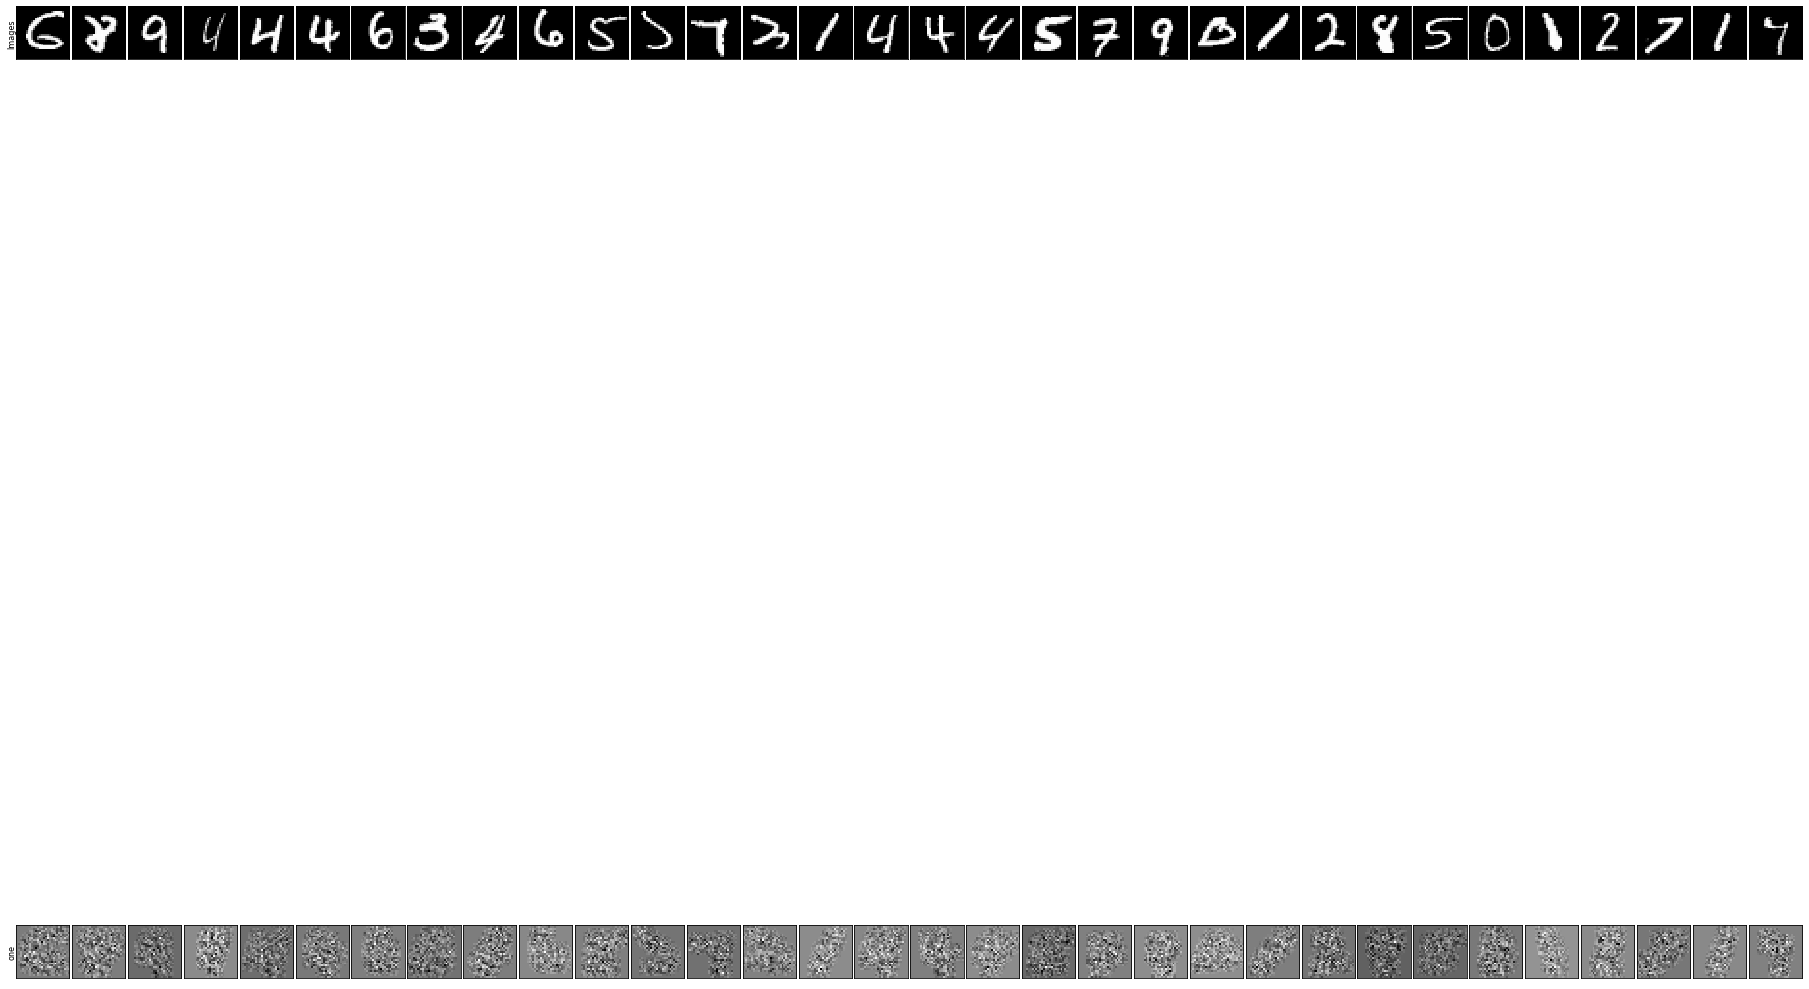

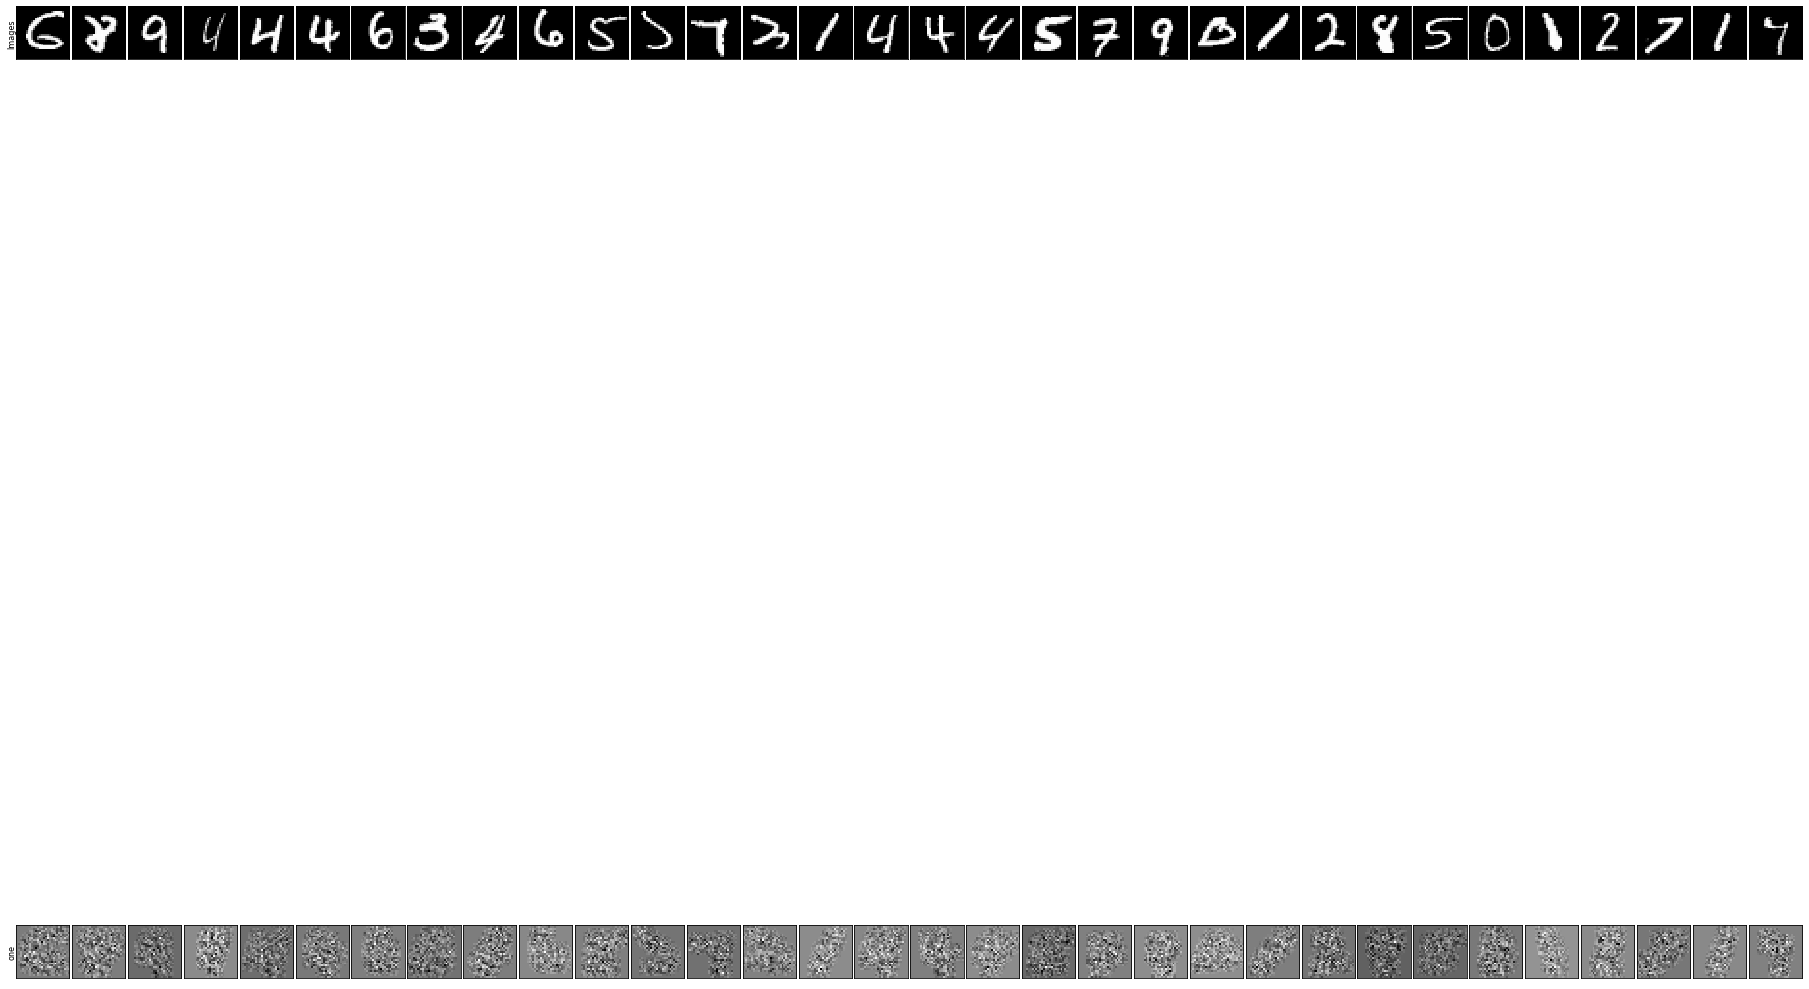

In [5]:
for x in data_dict['test']:
    images = tf.cast(x['image'], tf.float32)
    break
plot_grads(images, [model], ['one'], [28,28], data_dict['num_classes'])